<a href="https://colab.research.google.com/github/mxmlnde/BV2/blob/main/BV2_Uebung06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import math
import os
import random
from matplotlib import pyplot as plt
from collections import deque
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pfad zur CSV-Datei
a_file_path = '/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/A_vs_B/A.csv'
b_file_path = '/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/A_vs_B/B.csv'

# Laden der CSV-Dateien als Pandas DataFrame
a_raw_data = pd.read_csv(a_file_path, delimiter=';')
a_raw_data['target'] = 1

b_raw_data = pd.read_csv(b_file_path, delimiter=';')
b_raw_data['target'] = -1

ab_raw_data = pd.concat([a_raw_data, b_raw_data], ignore_index=True)

In [4]:
# Aufteilung in Features und Zielvariable
x = ab_raw_data.drop('target', axis=1)
y = ab_raw_data['target']

# Aufteilung in Trainings- und Testdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#Perzeptron
w = np.zeros(2) # Gewichte
n = 0.5 # Lernrate
# x Eingabewert, y geünschtes Ergbenis

def train_perzeptron_old(x_data, y_data, w, threshold):

  for i in range(y_data.shape[0]):
    y_data_row = y_data.iloc[i]

    y = y_data_row.iloc[1]
    # Wähle Traingsdaten
    x1 = x_data.iloc[i].iloc[3]# Hue 1
    x2 = x_data.iloc[i].iloc[4]# Hue 2
    # Berechne y^
    u = x1 * w[0] + x2 * w[1]
    y_d = 1 if u > threshold else -1
    #B estimme den Fehler
    d = y - y_d
    #A ktualisiere Gewichte
    w[0] = w[0] + n * d * x1
    w[1] = w[1] + n * d * x2

def train_perzeptron(x_data, y_data, w, threshold):
    for i in range(y_data.shape[0]):
        # Wähle Trainingsdaten aus x_data und y_data
        x1 = x_data.iloc[i].iloc[3]  # Hue 1
        x2 = x_data.iloc[i].iloc[4]  # Hue 2
        y = y_data.iloc[i]

        # Berechne y^-Wert
        u = x1 * w[0] + x2 * w[1]
        y_d = 1 if u > threshold else -1

        # Fehlerbestimmung
        d = y - y_d

        # Aktualisieren der Gewichte
        w[0] = w[0] + n * d * x1
        w[1] = w[1] + n * d * x2


In [7]:
def test_perzeptron(x_data, y_data, w, threshold):
  for i in range(y_data.shape[0]):
    # Wähle Testdaten aus x_data und y_data
    x1 = x_data.iloc[i].iloc[3]  # Hue 1
    x2 = x_data.iloc[i].iloc[4]  # Hue 2
    y = y_data.iloc[i]

    # Berechnen y^ (vorhergesagter Wert)
    u = x1 * w[0] + x2 * w[1]
    y_d = 1 if u > threshold else -1

    print(f"{x_data.iloc[i].iloc[0]}: {y_d}=={y}, {'Wahr' if y_d == y else 'Falsch'}")

In [8]:
for i in range(1000):# Trainieren mit 1000 Durchgängen
  train_perzeptron(x_train, y_train, w, 0)

print(w)

[-51.89291603  13.92560914]


In [9]:
test_perzeptron(x_test, y_test, w, 0)# Test der Geiwcht mit Test-Datensatz

img001.jpg: 1==1, Wahr
img009.jpg: 1==1, Wahr
img008.jpg: -1==-1, Wahr
img060.jpg: 1==1, Wahr
img021.jpg: 1==1, Wahr
img020.jpg: -1==-1, Wahr
img063.jpg: 1==1, Wahr
img013.jpg: -1==-1, Wahr
img020.jpg: 1==1, Wahr
img002.jpg: -1==-1, Wahr
img062.jpg: 1==1, Wahr
img026.jpg: -1==-1, Wahr
img025.jpg: 1==1, Wahr


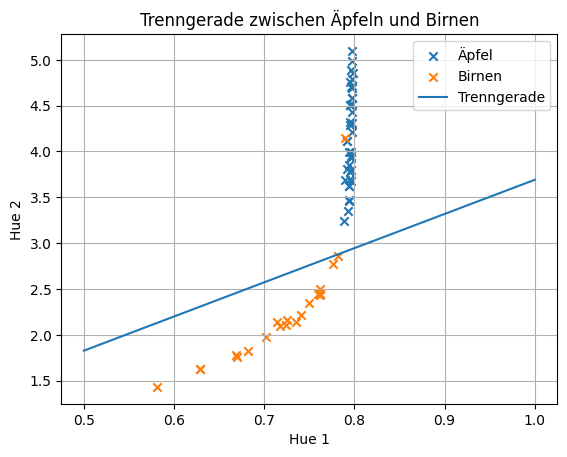

In [14]:
# Gewichte und Bias
w1 = w[0]# Gewichte
w2 = w[1]
b = 0.5   # Bias-Wert?

ax = a_raw_data.iloc[:, 3]# Hue 1 Apfel
ay = a_raw_data.iloc[:, 4]# Hue 2
bx = b_raw_data.iloc[:, 3]# Hue 1 Birne
by = b_raw_data.iloc[:, 4]# Hue 2

x_values = [0.5, 1]

# Y-Werte basierend auf der Geradengleichung berechnen
y_values = [(-w1/w2) * x - b/w2 for x in x_values]

# Plotten
plt.scatter(ax, ay, marker='x', label='Äpfel')
plt.scatter(bx, by, marker='x', label='Birnen')

plt.plot(x_values, y_values, label='Trenngerade')
plt.xlabel('Hue 1')
plt.ylabel('Hue 2')
plt.title('Trenngerade zwischen Äpfeln und Birnen')
plt.legend()
plt.grid(True)
plt.savefig(f'/content/drive/My Drive/Colab Notebooks/BV2/apfel_birne_gerade_{datetime.now()}.png', dpi=300)
plt.show()